##### <center>MASTER 2 ÉCONOMÉTRIE ET STATISTIQUES APPLIQUÉES</center>
##### <center>SVM ET RÉSEAUX DE NEURONES</center>
##### <center>CLASSIFICATION D'IMAGES DE SPORTS</center>
##### <img src="reseaux.jpg" alt="reseaux" width="400"/>
##### <center>PAR</center>
##### <center>ALEXANDRE GLOANNEC</center>
##### <center>ESTEBAN PASCAL</center>
##### <center>SOUS LA DIRECTION DE M. BENJAMIN ROUL</center>
##### <center>FÉVRIER 2023</center>

# ***Problématique de l'étude de cas***
# Classification d'images de balles de sports

---

<div style="text-align: justify">
Le machine learning est la science du développement d'algorithmes et de modèles statistiques que les systèmes informatiques utilisent pour effectuer des tâches sans instructions explicites, en s'appuyant sur des modèles et des déductions. Les systèmes informatiques utilisent des algorithmes de machine learning pour traiter de grandes quantités de données historiques et identifier des modèles de données. Cela leur permet de prédire les résultats avec davantage de précision à partir d'un jeu de données d'entrée donné. Par exemple, les scientifiques des données pourraient entraîner une application médicale en vue de diagnostiquer le cancer à partir d'images radiographiques en stockant des millions d'images numérisées et les diagnostics correspondants. L'objectif de ce projet a donc été d'appliquer la méthodologie d'un projet de Machine Learning sur un jeu de données concernant la classification d'images de balles de sports, sports tels que le baseball, le rugby, le football, le tennis, etc...<br>

Le projet en question correspond à un projet issu du site Kaggle. Nous utiliserons la base Kaggle "Sports balls - multiclass image classification". N'ayant pas encore eu l'occasion de travailler avec une classification d'images, 
nous avons dès lors eu la volonté de nous challenger afin de réaliser un projet différent de ce dont nous avions l'habitude. Néanmoins, excepté durant le cours d'SVM et réseaux de neurones de cette année, nous n'avions jamais travaillé auparavant sur une base de données composée d'images à classifier. Ce qui nous a alors posé quelques problèmes pour l'importation des données puisque lors de ce cours nous avions pu observer l'exemple concernant la base de données "MNIST", cependant l'importation de cette dernière est bien différente de la nôtre. En effet, trouver une solution exploitable pour importer les images nous a pris un certain temps.  Nous avons donc procédé de deux manières, une première qui nous a pu nous permettre dans un premier temps de visualiser les images de la base de données, mais avec laquelle nous n'avons pas réussi à modéliser. Une seconde qui nous a cette fois-ci permis de modéliser, mais avec laquelle nous n'avons pas réussi à visualiser les images.<br>

Durant ce projet, nous utiliserons donc une combinaison de ces deux méthodes afin de réaliser un modèle de classification multiclass.

    *Source de données : https://www.kaggle.com/datasets/samuelcortinhas/sports-balls-multiclass-image-classification 

# 1) Importation des packages et librairies

In [ ]:
import keras
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from skimage.transform import resize
from skimage.io import imread

## Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Multiclass strategie
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

## Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

## Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tqdm import tqdm
%matplotlib inline
import os

# 2) Fonctions

a = Y_pred, b = y_test

In [2]:
## Afficher Y_test, les données prédites par le modèle ainsi que la qualité du modèle
def qual_prev(a,b):
    print("The predicted Data is :")
    print(a)
    print("The actual data is:")
    print(np.array(b))
    print(f"The model is {accuracy_score(a,b)*100}% accurate")

In [3]:
## Matrice de confusion
def matrice_de_confusion(a,b):
    conf_matrix = confusion_matrix(b, a)
    df_cm = pd.DataFrame(conf_matrix, index=['basketball','billiard_ball','cricket_ball','football','golf_ball','hockey_puck','rugby_ball','shuttlecock','table_tennis_ball','volleyball']
                         , columns= ['Predicted basketball','Predicted billiard_ball','Predicted cricket_ball','Predicted football','Predicted golf_ball','Predicted hockey_puck','Predicted rugby_ball','Predicted shuttlecock','Predicted table_tennis_ball','Predicted volleyball'])
    display(df_cm)

In [3]:
## Afficher le nombre de mauvaises prédictions par catégorie
def difference(a,b):
    differ = a!=b
    differ = pd.DataFrame(differ)
    Valeur_y_test = pd.DataFrame(y_test)
    differ['Y_test'] = Valeur_y_test
    differ = differ.fillna(0)
    test = differ[differ['Target'] == True]
    print(test['Y_test'].value_counts())

# 3) Importation du jeu de données

---

## 1ère méthode : Importer les images afin de les visualiser  

Cette méthode nous permettra aussi d'observer quelles images notre modèle a du mal à prédire.

In [5]:
## Importer une base comportant les ID de chaque images ainsi que le nom du dossier dans lequel elles sont présentes
base=pd.read_excel("C:/Users/alexa/OneDrive/Bureau/M2_EKAP/S1/SVM/dossier/base_importation.xlsx")
base.head()

,ID,Sport
0,american_football_0,american_football
1,american_football_1,american_football
2,american_football_2,american_football
3,american_football_3,american_football
4,american_football_4,american_football


In [6]:
## Boucle pour passer toutes les images dans une np.array
base_image = []
label_image= []
for i in tqdm(range(base.shape[0])):
    path = 'C:/Users/alexa/OneDrive/Bureau/M2_EKAP/S1/SVM/dossier/train/'+base['Sport'][i]+'/'+base['ID'][i]+'.jpg'
    existe = os.path.exists(path)
    if existe == True :
        # récupérer les images 
        img = image.load_img(path,target_size=(400,400,3))
        img = image.img_to_array(img)
        img = img/255 # permet de régler le pb : "Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)."
        base_image.append(img)
        # récupérer le label des images 
        label = base['ID'][i]+'.jpg'  # changer en fonction du code
        label_image.append(label)
        
image_sport = np.array(base_image)
nom_image = np.array(label_image)

100%|██████████| 14579/14579 [00:44<00:00, 330.53it/s]


À présent il s'agit de vérifier si les images ont bien été importées.

In [7]:
image_sport.shape # 6786 images importées 

(6786, 400, 400, 3)

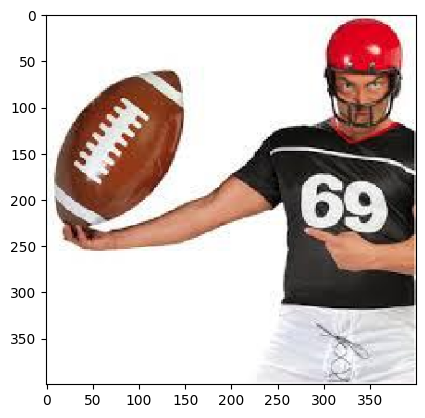

In [8]:
## American football
plt.imshow(image_sport[0])

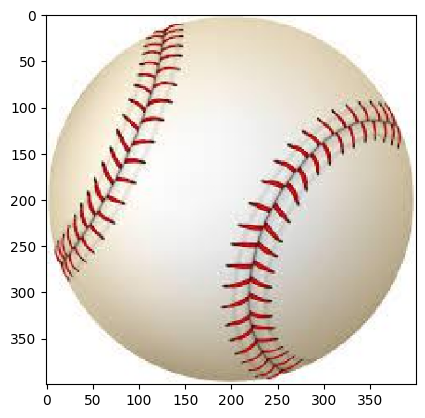

In [9]:
## Baseball
plt.imshow(image_sport[384])

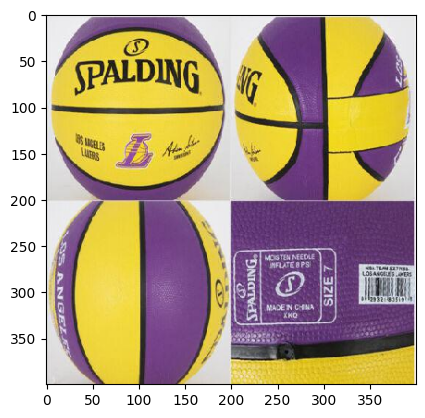

In [10]:
## Basketball
plt.imshow(image_sport[784])

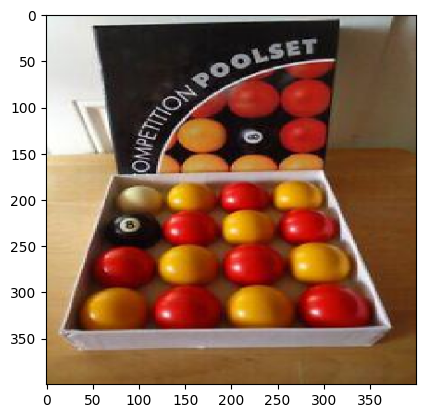

In [11]:
## Billard_ball
plt.imshow(image_sport[1430])

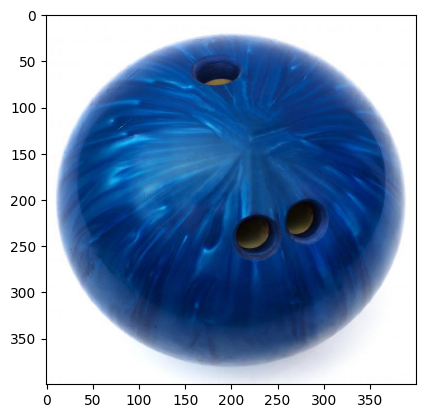

In [12]:
## Bowling_ball
plt.imshow(image_sport[2074])

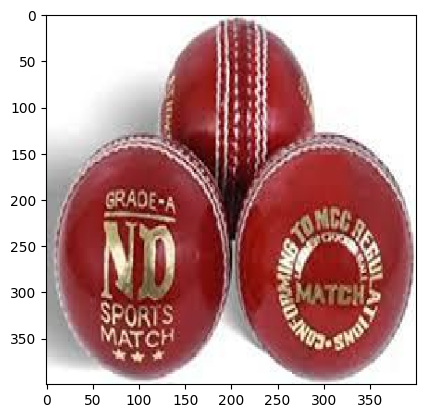

In [13]:
## Cricket_ball
plt.imshow(image_sport[2515])

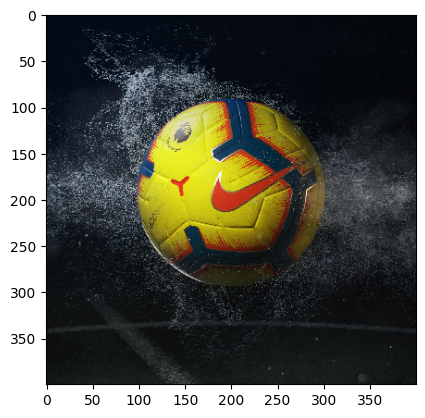

In [14]:
## Football
plt.imshow(image_sport[3093])

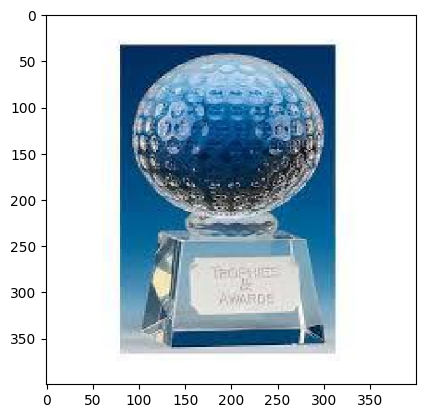

In [15]:
## Golf
plt.imshow(image_sport[3701])

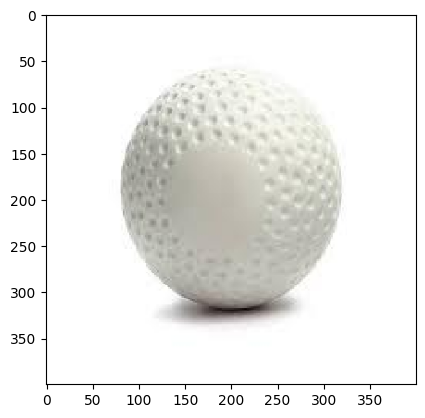

In [16]:
## Hockey_ball
plt.imshow(image_sport[4250])

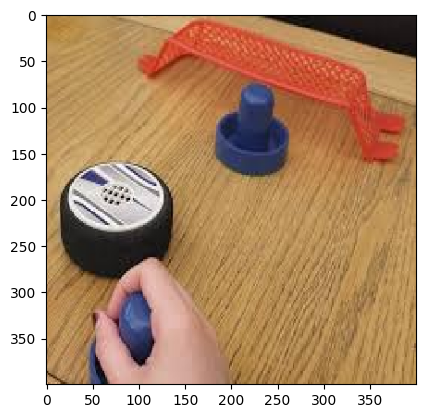

In [17]:
## Hockey_puck
plt.imshow(image_sport[4780])

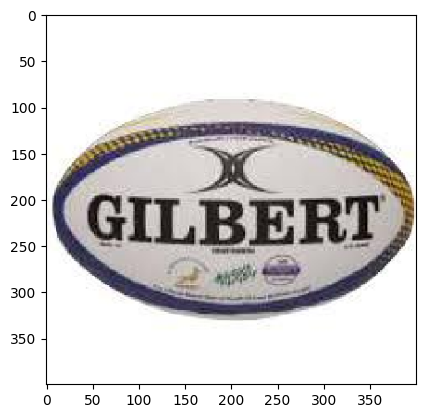

In [18]:
## Rugby_ball
plt.imshow(image_sport[5170])

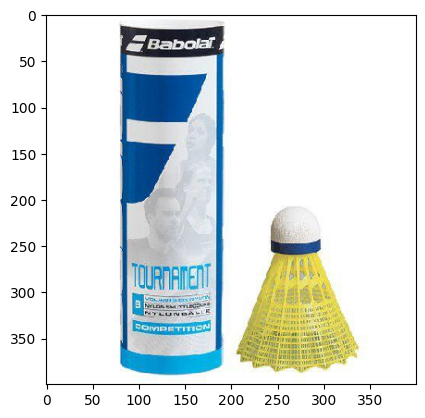

In [19]:
## Badminton 
plt.imshow(image_sport[5663])

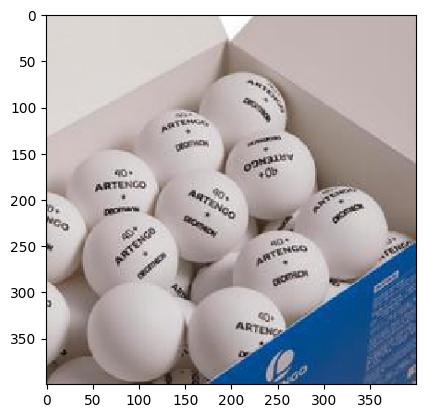

In [20]:
## Tennis de table
plt.imshow(image_sport[6092])

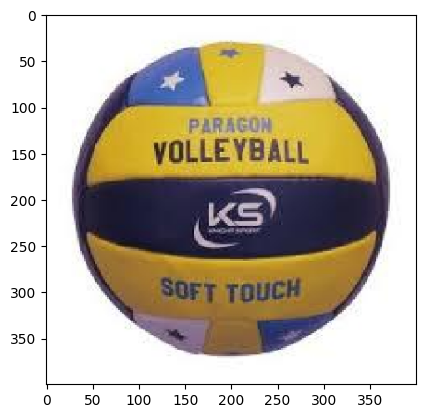

In [21]:
## Volley
plt.imshow(image_sport[6712])

Bien que cette méthode soit utile afin d'importer des images, elle n'est pas exploitable pour réaliser une classification. En effet, le premier problème de cette méthode est que les images sont importées sous forme d'une array à 4 dimensions, ce qui rend difficile la modélisation. Le deuxième problème est que nous n'avons pas réussi à exploiter de variables explicatives, ce qui nous aurait ainsi permis de réaliser une classification.<br>
Afin de régler ces problémes, nous avons donc procédé d'une autre manière pour importer nos images. Ce qui nous a donc aider à obtenir des variables explicatives et donc de réaliser notre classification.

## 2ème méthode : Importer les images afin de les modéliser

Dans un souci de clarté et de temps de calcul pour la performance de notre code, nous avons été obligé de supprimer deux catégories, à savoir "tennis" et "bowling". Après concertation, ces deux catégories à suprimer ont été décidés par nous-même.<br>
À noter que plus-tard au cours de l'analyse, nous procéderons à différentes méthodes de rééchantillonage avec nos catégories conservées.

In [7]:
## Catégories
Categories=['basketball','billiard_ball','cricket_ball','football','golf_ball','hockey_puck','rugby_ball','shuttlecock','table_tennis_ball','volleyball']

In [6]:
## Nous mettons dans une liste le nom des dossiers où les différentes images sont présentes 

entree=[] # tableau d'entrée
sortis=[] # tableau de sortie 
chemin='C:/Users/alexa/OneDrive/Bureau/M2_EKAP/S1/SVM/dossier/train/' 
# Chemin contenant tous les fichiers d'images
for i in Categories:
    
    print(f'chargement de la categorie : {i}')
    path=os.path.join(chemin,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        entree.append(img_resized.flatten())
        sortis.append(Categories.index(i))
    print(f'Categorie {i} correctement chargée')
    
flat_data=np.array(entree)
target=np.array(sortis)
df=pd.DataFrame(flat_data) # dataframe
df['Target']=target
x=df.iloc[:,:-1] # input data 
y=df.iloc[:,-1] # output data

chargement de la categorie : basketball
Categorie basketball correctement chargée
chargement de la categorie : billiard_ball
Categorie billiard_ball correctement chargée
chargement de la categorie : cricket_ball
Categorie cricket_ball correctement chargée
chargement de la categorie : football
Categorie football correctement chargée
chargement de la categorie : golf_ball
Categorie golf_ball correctement chargée
chargement de la categorie : hockey_puck
Categorie hockey_puck correctement chargée
chargement de la categorie : rugby_ball
Categorie rugby_ball correctement chargée
chargement de la categorie : shuttlecock
Categorie shuttlecock correctement chargée
chargement de la categorie : table_tennis_ball
Categorie table_tennis_ball correctement chargée
chargement de la categorie : volleyball
Categorie volleyball correctement chargée


In [24]:
## Affichage de x
x

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.976952,0.976952,0.983122,0.983125,0.983125,0.987262,0.981956,0.981956,0.986863,0.980613,...,0.159464,0.854002,0.738811,0.146297,0.855619,0.748734,0.188029,0.924234,0.850713,0.597427
1,0.830624,0.780126,0.700888,0.839927,0.760643,0.660740,0.861544,0.776617,0.680653,0.866630,...,0.167154,0.784300,0.344338,0.157456,0.785438,0.337176,0.153353,0.781627,0.328489,0.162999
2,0.038979,0.091790,0.111659,0.368212,0.367290,0.408376,0.680429,0.580142,0.661666,0.676073,...,0.006030,0.455146,0.133360,0.012885,0.357697,0.115126,0.035997,0.068961,0.029079,0.041255
3,0.709804,0.760785,0.792157,0.709804,0.760785,0.792157,0.709804,0.760785,0.792157,0.710032,...,0.803900,0.719733,0.770149,0.801710,0.717645,0.768621,0.799995,0.715944,0.766925,0.798297
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,0.380662,0.290466,0.164975,0.385473,0.295277,0.169787,0.396244,0.306048,0.180557,0.403413,...,0.294423,0.611564,0.486074,0.286074,0.594014,0.474241,0.272024,0.583469,0.466667,0.263608
5080,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078
5081,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
5082,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078


Maintenant, nous avons essayé de visualiser les images à l'aide du code issue de la démo SVM présente au sein du chapitre 1 concernant les SVM sous python. Nous avons aussi essayé d'autres méthodes mais en vain.

In [25]:
# def plot_img(choose_img, X) :
#     plt.imshow(X[choose_img].reshape(28,28), cmap='gray')
#     plt.title("Cette image est un :" + str(y[choose_img]))

In [26]:
# plot_img(choose_img = 1 , X = x)

In [27]:
## Nombre d'images par catégorie 
y.value_counts()

1    646
8    620
3    604
2    581
4    549
6    493
9    432
7    429
5    390
0    340
Name: Target, dtype: int64

La répartition des images présentes au sein de chaque catégorie est sensiblement égale entre chaque catégorie. Ainsi, un rééchantillonage de notre jeu de données n'est a priori pas nécessaire, mais par souci d'analyse approfondie, nos modélisations, qui seront présentées dans la partie suivante, seront à la fois réalisées avec et sans rééchantillonage de notre jeu de données. 

# Data préparation


---

## Analyse du jeu de données

*   Analyse des variables (Variable d'intérêt / Variables explicatives)
*   Identification des valeurs manquantes
*   Identification et correction des outliers

---

# Nettoyage du jeu de données

*   Imputation de valeurs manquantes 

---

# Standardisation du jeu de données

---

Étant donné notre jeu de données composé d'images à classifier, l'ensemble des étapes énoncées ci-dessous n'ont pas été / pu être réalisées. Le cas échéant, celles-ci auraient du être développées de manière rigoureuse.<br>
C'est pour cette raison que nous sommes directement passé à notre étape de modélisation.

---

# 4) Séparation de notre jeu de données train

---

<div style="text-align: justify">
La validation croisée est une technique d’apprentissage supervisé pour vérifier la fiabilité d’un modèle.<br>

Ici nous utlisons la validation croisée Hold Out pour séparer notre jeu train en deux nouvelles bases :<br>
    
- Un échantillon d’apprentissage pour entraîner les paramètres du modèle.
- Un échantillon de validation pour vérifier la déviance du modèle.<br>
    
Le split du jeu de données s'est effectué de la manière suivante : 80% du jeu de données en jeu train et 20% du jeu de données en jeu test.

In [7]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

# 5) Modélisation

---

<div style="text-align: justify">
Nous allons maintenant présenter la modélisation et les résultats obtenus en termes de performance pour chacun de nos modèles choisis dans cette étude avec nos catégories retenues. À noter que nous présenterons pour chacun de nos modèles à la fois les résultats de nos modélisations obtenus sans rééchantillonage et avec rééchantillonage du jeu de données.

## Méthodes employées :
    
    ### Partie OVR :
    
    - OneVSRestClassifier (SVC)
    - OneVsRestClassifier (LinearSVC)
    - OneVsRestClassifier (SGDClassifier) 
    
    ### Partie OVO :
    
    - OneVsOneClassifier (SVC)
    - OneVsOneClassifier (LinearSVC)
    - OneVsOneClassifier (SGDClassifier) 

    ### MLP avec keras
    ### Arbre de décision
    ### GradientBoostingClassifier
    ### Random Forest
    ### Ridge Classifier
    ### Régression Logistique

    * Application des modèles à l’échantillon test.
    * Comparaison de la performance des modèles (Matrice de confusion, Accuracy).
    * Interprétation de notre meilleur modèle.

## Modélisation sans rééchantillonage

---

## Partie OVR 

---

<div style="text-align: justify">
Stratégie multiclass/multilabel OneVSRestClassifier (OVR), également connue sous le nom de OneVSAll. Cette approche consiste à ajuster un classifieur par classe. Pour chaque classificateur, la classe est ajustée par rapport à toutes les autres classes. En plus de son efficacité de calcul (seuls les classificateurs n_classes sont nécessaires), l'un des avantages de cette approche est son interprétabilité. Étant donné que chaque classe est représentée par un et un seul classificateur, il est possible d'acquérir des connaissances sur la classe en inspectant son classificateur correspondant. Il s'agit de la stratégie la plus couramment utilisée pour la classification multiclasse et c'est un choix par défaut équitable.

### OneVSRestClassifier (SVC)

In [29]:
## Import OVR
from sklearn.multiclass import OneVsRestClassifier

## Import SVM
from sklearn.svm import SVC

OvR_SVC_clf = OneVsRestClassifier(SVC())

OvR_SVC_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [30]:
Y_pred = OvR_SVC_clf.predict(X_test)

In [31]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[8 8 5 ... 1 1 0]
The actual data is:
[2 8 8 ... 5 9 9]
The model is 49.164208456243855% accurate


In [32]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted basketball,Predicted billiard_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
basketball,22,8,12,9,0,3,3,2,6,3
billiard_ball,2,75,7,8,5,15,4,2,8,3
cricket_ball,1,7,78,6,1,3,5,1,11,3
football,1,14,9,44,16,6,13,1,8,9
golf_ball,0,16,4,14,41,6,3,7,14,5
hockey_puck,1,6,13,7,1,32,4,4,9,1
rugby_ball,2,4,3,4,11,5,56,3,6,5
shuttlecock,0,6,0,6,3,2,5,52,10,2
table_tennis_ball,2,10,5,5,9,5,4,13,69,2
volleyball,5,8,3,17,4,5,4,4,5,31


In [33]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3    77
4    69
8    55
9    55
1    54
0    46
5    46
6    43
2    38
7    34
Name: Y_test, dtype: int64


### OneVSRestClassifier (LinearSVC)

In [34]:
## Import OVR
from sklearn.multiclass import OneVsRestClassifier

## Import SVM
from sklearn.svm import SVC

OvR_SVCL_clf = OneVsRestClassifier(LinearSVC())

OvR_SVCL_clf.fit(X_train, y_train)

C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: Convergenc

OneVsRestClassifier(estimator=LinearSVC())

In [35]:
Y_pred = OvR_SVCL_clf.predict(X_test)

In [36]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[3 8 1 ... 9 8 7]
The actual data is:
[2 8 8 ... 5 9 9]
The model is 39.233038348082594% accurate


In [37]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted basketball,Predicted billiard_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
basketball,17,7,6,7,4,9,2,2,11,3
billiard_ball,4,42,8,15,14,9,4,10,14,9
cricket_ball,2,13,61,7,10,3,4,3,13,0
football,6,15,13,29,18,6,12,8,9,5
golf_ball,2,6,6,8,36,12,7,9,18,6
hockey_puck,2,2,10,3,8,31,4,5,9,4
rugby_ball,2,4,10,3,11,7,44,6,6,6
shuttlecock,1,4,3,4,7,0,1,48,12,6
table_tennis_ball,0,9,5,4,11,5,8,12,67,3
volleyball,4,9,14,7,11,2,3,2,10,24


In [38]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3    92
1    87
4    74
9    62
8    57
2    55
6    55
0    51
5    47
7    38
Name: Y_test, dtype: int64


### OneVsRestClassifier (SGDClassifier) 

In [39]:
OvR_SGDClassifier_clf = OneVsRestClassifier(SGDClassifier())

OvR_SGDClassifier_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SGDClassifier())

In [40]:
Y_pred = OvR_SGDClassifier_clf.predict(X_test)

In [41]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[3 7 7 ... 9 8 6]
The actual data is:
[2 8 8 ... 5 9 9]
The model is 29.793510324483773% accurate


In [42]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted basketball,Predicted billiard_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
basketball,2,4,16,13,1,2,1,17,11,1
billiard_ball,0,44,9,20,3,5,3,34,11,0
cricket_ball,2,7,64,9,2,0,2,24,6,0
football,0,7,12,39,9,1,9,36,7,1
golf_ball,1,6,6,13,7,3,1,64,7,2
hockey_puck,0,3,14,11,0,14,0,35,0,1
rugby_ball,0,4,7,10,4,1,19,52,1,1
shuttlecock,0,5,0,5,1,0,2,66,6,1
table_tennis_ball,0,1,3,2,3,2,3,70,38,2
volleyball,0,4,7,13,1,1,3,38,9,10


In [43]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

4    103
8     86
1     85
3     82
6     80
9     76
0     66
5     64
2     52
7     20
Name: Y_test, dtype: int64


## Partie OVO

---

<div style="text-align: justify">
OneVsOneClassifier construit un classificateur par paire de classes. Au moment de la prédiction, la classe qui a reçu le plus de votes est sélectionnée. En cas d'égalité (entre deux classes avec un nombre égal de votes), il sélectionne la classe avec la confiance de classification agrégée la plus élevée en additionnant les niveaux de confiance de classification par paire calculés par les classificateurs binaires sous-jacents. Puisqu'elle nécessite d'adapter n_classes * (n_classes - 1) / 2 classificateurs, cette méthode est généralement plus lente que OneVSRestClassifier, en raison de sa complexité O (n_classes^2). La fonction de décision est le résultat d'une transformation monotone de la classification un contre un.

### OneVSOneClassifier (SVC)

In [8]:
## Import OVO
from sklearn.multiclass import OneVsOneClassifier

Ovo_SVC_clf = OneVsOneClassifier(SVC())

Ovo_SVC_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC())

In [9]:
Y_pred = Ovo_SVC_clf.predict(X_test)

In [10]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[8 8 5 ... 1 1 8]
The actual data is:
[2 8 8 ... 5 9 9]
The model is 41.789577187807275% accurate


In [11]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted basketball,Predicted billiard_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
basketball,10,10,12,13,3,4,2,2,10,2
billiard_ball,2,74,8,9,7,7,4,3,14,1
cricket_ball,0,15,67,4,3,2,1,1,21,2
football,1,16,8,46,18,2,8,2,14,6
golf_ball,1,17,3,12,40,4,2,10,19,2
hockey_puck,2,7,14,7,2,24,2,10,9,1
rugby_ball,1,7,6,11,22,1,40,0,11,0
shuttlecock,0,9,0,4,10,0,2,44,16,1
table_tennis_ball,0,16,3,4,15,4,4,16,62,0
volleyball,5,12,3,23,6,3,4,3,9,18


In [12]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3    75
4    70
9    68
8    62
6    59
0    58
1    55
5    54
2    49
7    42
Name: Y_test, dtype: int64


### OneVsOneClassifier (LinearSVC) 

In [13]:
## Import SVM
from sklearn.svm import SVC

Ovo_SVCL_clf = OneVsOneClassifier(LinearSVC())

Ovo_SVCL_clf.fit(X_train, y_train)

C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: Convergenc

OneVsOneClassifier(estimator=LinearSVC())

In [14]:
Y_pred = Ovo_SVCL_clf.predict(X_test)

In [15]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[8 8 5 ... 9 8 4]
The actual data is:
[2 8 8 ... 5 9 9]
The model is 41.789577187807275% accurate


In [16]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted basketball,Predicted billiard_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
basketball,25,3,8,6,5,4,2,3,11,1
billiard_ball,10,48,9,8,5,13,5,7,19,5
cricket_ball,10,12,61,4,5,3,6,2,12,1
football,4,9,10,34,21,10,11,5,8,9
golf_ball,4,6,6,6,40,7,6,10,20,5
hockey_puck,1,3,10,3,7,29,6,5,10,4
rugby_ball,1,2,7,6,16,5,44,6,7,5
shuttlecock,0,6,2,3,3,1,3,47,14,7
table_tennis_ball,0,6,5,2,9,9,3,12,70,8
volleyball,6,9,10,5,14,7,2,2,4,27


In [17]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3    87
1    81
4    70
9    59
2    55
6    55
8    54
5    49
0    43
7    39
Name: Y_test, dtype: int64


### OneVsOneClassifier (SGDClassifier)

In [18]:
Ovo_SGDClassifier_clf = OneVsOneClassifier(SGDClassifier())

Ovo_SGDClassifier_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier())

In [19]:
Y_pred = Ovo_SGDClassifier_clf.predict(X_test)

In [20]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[8 8 5 ... 9 2 6]
The actual data is:
[2 8 8 ... 5 9 9]
The model is 31.66175024582104% accurate


In [21]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted basketball,Predicted billiard_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
basketball,23,7,2,7,9,4,4,5,5,2
billiard_ball,9,59,5,5,8,15,4,10,12,2
cricket_ball,18,28,35,1,15,5,3,3,7,1
football,7,22,6,23,27,8,9,14,2,3
golf_ball,1,17,4,4,53,8,2,14,4,3
hockey_puck,7,6,4,3,18,26,3,8,1,2
rugby_ball,0,13,2,7,27,7,33,10,0,0
shuttlecock,0,7,1,1,23,1,3,42,5,3
table_tennis_ball,3,21,6,0,40,13,2,19,17,3
volleyball,6,19,7,7,13,9,5,7,2,11


In [22]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

8    107
3     98
2     81
9     75
1     70
6     66
4     57
5     52
0     45
7     44
Name: Y_test, dtype: int64


## MLP avec keras

---

<div style="text-align: justify">
En intelligence artificielle, plus précisément en apprentissage automatique, le perceptron multicouche (multilayer perceptron, MLP) est un type de réseau neuronal artificiel organisé en plusieurs couches. L'information circule de la couche d'entrée vers la couche de sortie uniquement : il s'agit donc d'un réseau à propagation directe (feedforward). Chaque couche est constituée d'un nombre variable de neurones, les neurones de la dernière couche (dite « de sortie ») étant les sorties du système global.

In [ ]:
## Paramètres

## Input neurons : Nombre de features + biais
## Hidden layer	: Généralement entre 1 et 5
## Neurons per hidden layer	: Généralement entre 10 et 100
## Output neurons : 1 par classe
## Output layer activation : Softmax
## Loss function : Cross entropy

In [57]:
## Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [58]:
## Définir un model séquentiel
model = keras.models.Sequential()

## Ajouter les couches dans le modèle
model.add(keras.layers.Flatten(input_shape=[67500]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

## Couche de sortie, action softmax car multiclass
model.add(keras.layers.Dense(3, activation="softmax"))

In [59]:
## Résumé du modèle
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               20250300  
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 20,280,703
Trainable params: 20,280,703
Non-trainable params: 0
_________________________________________________________________


In [60]:
## Obtenir le poids pour les paramètres et biais
w, biais = model.layers[1].get_weights()
print(w)

## Format de sortie
print(w.shape)

[[-0.00019399  0.00893786  0.00143694 ... -0.00129011 -0.00837734
   0.00926318]
 [-0.00144245  0.00812233  0.00566435 ... -0.00192057 -0.00288047
  -0.00600069]
 [ 0.00085288 -0.00148377  0.0092243  ...  0.00527974  0.00510428
   0.0089706 ]
 ...
 [-0.00304676 -0.00092621 -0.00093991 ...  0.00526068  0.00206948
   0.00424491]
 [ 0.00821674 -0.00187359  0.00036086 ...  0.0027039   0.00068138
  -0.00450892]
 [-0.00817049 -0.00888432  0.00481946 ...  0.00708737  0.00718122
  -0.0068237 ]]
(67500, 300)


In [61]:
## Définir la fonction de perte
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
             )

In [64]:
#tf.expend_dims(X_train, axis=-1)
train_model =model.fit(x, y, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\alexa\anaconda3\envs\test\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\alexa\anaconda3\envs\test\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\alexa\anaconda3\envs\test\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\alexa\anaconda3\envs\test\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\alexa\anaconda3\envs\test\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\alexa\AppData\Local\Temp\ipykernel_15200\2172166954.py", line 2, in <module>
      train_model =model.fit(x, y, epochs=10, validation_data=(X_test,y_test))
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\engine\training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\alexa\anaconda3\envs\test\lib\site-packages\keras\backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 9 which is outside the valid range of [0, 3).  Label values: 8 8 6 9 3 3 3 0 4 6 6 5 4 5 3 1 1 3 2 3 6 9 4 2 1 8 6 8 2 3 3 5
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1323]

In [ ]:
## Paramètre du modèles
train_model.params

## Dictionnaire modèle history
train_model.history.keys()

In [62]:
def plot_accuracy(model):
    training_accuracy = model.history['accuracy']
    validation_acc = model.history['val_accuracy']
    index_accuracy = np.argmax(validation_acc)
    accuracy_highest = validation_acc[index_accuracy]
    
    Epochs = [i+1 for i in range(len(training_accuracy))]
    plt.plot(Epochs, training_accuracy, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, validation_acc, 'b', label= 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout
    plt.show()

In [63]:
plot_accuracy(train_model)

NameError: name 'train_model' is not defined

In [ ]:
train_model.evaluate(x_test, y_test)

In [ ]:
train_model.predict_classes(x_test)

In [ ]:
model.predict(X_test) 

<div style="text-align: justify">
Malheureusement nous n'avons pas réussi à obtenir quelconque résultat interprétable à l'aide de la méthode MLP avec Keras.<br>
Cependant, nous avons souhaité tester d'autres modèles que ceux vus en cous. Par conséquent, nous avons décidé du choix de ces modèles à l'aide de la documentation suivante : https://scikit-learn.org/stable/modules/multiclass.html  

## Arbre de décision

---

<div style="text-align: justify">
Un arbre de décision est un outil d'aide à la décision représentant un ensemble de choix sous la forme graphique d'un arbre. Les différentes décisions possibles sont situées aux extrémités des branches (les « feuilles » de l'arbre), et sont atteintes en fonction de décisions prises à chaque étape. L'arbre de décision est un outil utilisé dans des domaines variés tels que la sécurité, la fouille de données, la médecine, etc. Il a l'avantage d'être lisible et rapide à exécuter. Il s'agit de plus d'une représentation calculable automatiquement par des algorithmes d'apprentissage supervisé.

In [23]:
## Implémentation du modèle DecisionTreeClassifier sans spécification (paramètres par défaut)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [24]:
arbre = tree.DecisionTreeClassifier()

In [25]:
arbre.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
Y_pred = arbre.predict(X_test)

In [27]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[9 2 5 ... 7 4 4]
The actual data is:
[2 8 8 ... 5 9 9]
The model is 32.35004916420846% accurate


In [28]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted basketball,Predicted billiard_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
basketball,18,8,11,10,3,4,3,3,5,3
billiard_ball,8,43,7,16,15,14,8,4,7,7
cricket_ball,8,12,56,7,7,5,6,4,6,5
football,5,13,8,42,10,8,8,7,9,11
golf_ball,4,13,10,12,20,8,7,12,17,7
hockey_puck,6,7,9,6,8,23,5,4,6,4
rugby_ball,3,7,10,18,11,3,27,2,7,11
shuttlecock,1,5,6,7,11,3,4,32,12,5
table_tennis_ball,6,10,16,6,9,6,9,8,49,5
volleyball,3,6,6,11,12,10,7,4,8,19


In [29]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

4    90
1    86
3    79
8    75
6    72
9    67
2    60
5    55
7    54
0    50
Name: Y_test, dtype: int64


## GradientBoostingClassifier

---

<div style="text-align: justify">
Le gradient boosting est un modèle ensembliste de boosting utilisant la descente de gradient pour optimiser une fonction de perte. Cette descente est utilisée pour le calcul des résidus des individus, lors de la construction du modèle suivant.
Cette méthode est implémentée dans la librairie scikit-learn : GradientBoostingRegressor et GradientBoostingClassifier.

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# gradient = GradientBoostingClassifier()

In [ ]:
# gradient.fit(X_train, y_train)

In [ ]:
# Y_pred = gradient.predict(X_test)

In [ ]:
# qual_prev(Y_pred,y_test)

In [ ]:
# matrice_de_confusion(Y_pred,y_test)

Au sujet du modèle GradientBoostingClassifier, celui-ci a nécessité un nombre conséquent de temps de calcul rien qu'avec 3 catégories afin de tester le modèle. C'est pourquoi nous n'avons pu malheureusement l'appliquer à l'ensemble de nos catégories et l'avons alors mis de côté.

## Random Forest

---

<div style="text-align: justify">
Le Random Forest est un modèle ensembliste basé sur la construction de multiples arbres de décision (CART).
Chaque arbre est construit à partir d’un échantillon aléatoire avec remise des individus et des variables. Lors d’une classification, la prédiction finale est la modalité majoritairement prédite.<br>
    
Les avantages sont les suivants :<br> 
- Accepte les variables qualitatives et quantitatives
- Pas besoin de vérifier des hypothèses de normalité et de variance
- Il répond aux problèmes de classification et régression
- Modèle relativement puissant sur des problèmes de modélisation complexe<br>

Tandis que les inconvénients sont :<br>
- Difficilement interprétable
- Attention au sur-apprentissage

In [30]:
## Implémentation du modèle RandomForestClassifier sans spécification (paramètres par défaut)
from sklearn.ensemble import RandomForestClassifier

In [31]:
RF = RandomForestClassifier()

In [32]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
Y_pred = RF.predict(X_test)

In [34]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[4 8 6 ... 1 1 6]
The actual data is:
[2 8 8 ... 5 9 9]
The model is 51.2291052114061% accurate


In [35]:
## Matrice de confusion 
matrice_de_confusion(Y_pred,y_test)

,Predicted basketball,Predicted billiard_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
basketball,22,10,8,7,4,2,2,1,9,3
billiard_ball,3,90,9,9,2,3,2,0,11,0
cricket_ball,2,9,80,8,5,0,2,0,10,0
football,2,18,9,52,13,4,7,1,11,4
golf_ball,1,13,5,9,50,4,1,6,19,2
hockey_puck,3,8,4,9,2,35,2,8,6,1
rugby_ball,3,10,4,13,10,1,49,1,6,2
shuttlecock,0,8,0,5,12,0,1,48,10,2
table_tennis_ball,1,20,3,4,12,1,5,4,73,1
volleyball,1,14,6,18,4,7,2,1,11,22


In [36]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3    69
9    64
4    60
8    51
6    50
0    46
5    43
1    39
7    38
2    36
Name: Y_test, dtype: int64


## RidgeClassifier

---

<div style="text-align: justify">
En apprentissage automatique, la classification ridge est une technique utilisée pour analyser les modèles discriminants linéaires. C'est une forme de régularisation qui pénalise les coefficients du modèle pour éviter le surajustement. Le surajustement est un problème courant dans l'apprentissage automatique qui se produit lorsqu'un modèle est trop complexe et capture le bruit dans les données au lieu du signal sous-jacent. Cela peut conduire à de mauvaises performances de généralisation sur de nouvelles données. La classification Ridge résout ce problème en ajoutant un terme de pénalité à la fonction de coût qui décourage la complexité. Il en résulte un modèle plus apte à généraliser à de nouvelles données. 

In [37]:
## Implémentation du modèle RidgeClassifierCV sans spécification (paramètres par défaut)
from sklearn.linear_model import RidgeClassifierCV

In [38]:
ridge = RidgeClassifierCV()

In [39]:
ridge.fit(X_train, y_train)

RidgeClassifierCV()

In [40]:
Y_pred = ridge.predict(X_test)

In [41]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[3 8 5 ... 7 8 7]
The actual data is:
[2 8 8 ... 5 9 9]
The model is 36.97148475909538% accurate


In [42]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted basketball,Predicted billiard_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
basketball,14,3,10,9,3,9,2,2,15,1
billiard_ball,5,45,8,13,16,11,3,10,12,6
cricket_ball,2,17,54,8,7,4,5,4,12,3
football,4,10,15,25,21,13,7,8,12,6
golf_ball,1,8,9,10,42,4,6,9,17,4
hockey_puck,1,3,8,7,10,28,6,5,6,4
rugby_ball,1,6,7,5,13,9,39,8,7,4
shuttlecock,1,5,6,3,6,2,2,42,16,3
table_tennis_ball,0,8,7,1,15,8,9,10,65,1
volleyball,2,9,10,6,12,1,6,8,10,22


In [43]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3    96
1    84
4    68
9    64
2    62
6    60
8    59
0    54
5    50
7    44
Name: Y_test, dtype: int64


## Régression logistique

---

<div style="text-align: justify">
La régression logistique est une technique d'analyse de données qui utilise les mathématiques pour trouver les relations entre deux facteurs de données. Elle utilise ensuite cette relation pour prédire la valeur de l'un de ces facteurs en fonction de l'autre. La régression logistique est une technique importante dans le domaine de l'intelligence artificielle et du machine learning. Les modèles de régression logistique peuvent traiter de grands volumes de données à grande vitesse, car ils nécessitent moins de capacité de calcul, comme la mémoire et la puissance de traitement.

In [44]:
## Implémentation du modèle LogisticRegression sans spécification (paramètres par défaut)
from sklearn.linear_model import LogisticRegression

In [45]:
LR = LogisticRegression(multi_class="multinomial")

In [46]:
LR.fit(X_train, y_train)

C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [47]:
Y_pred = LR.predict(X_test)

In [48]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[8 8 8 ... 9 1 0]
The actual data is:
[2 8 8 ... 5 9 9]
The model is 29.69518190757129% accurate


In [49]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted basketball,Predicted billiard_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
basketball,8,2,8,7,3,9,9,5,13,4
billiard_ball,5,38,7,11,5,15,13,12,18,5
cricket_ball,2,17,51,13,2,4,5,3,15,4
football,6,12,14,30,14,6,14,7,6,12
golf_ball,2,13,13,16,16,4,6,10,23,7
hockey_puck,0,2,15,6,7,23,4,5,11,5
rugby_ball,0,5,9,12,12,6,34,5,9,7
shuttlecock,0,3,2,12,3,2,2,35,23,4
table_tennis_ball,2,8,5,13,11,9,5,14,50,7
volleyball,3,14,12,12,6,5,7,5,5,17


In [50]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

4    94
1    91
3    91
8    74
9    69
2    65
6    65
0    60
5    55
7    51
Name: Y_test, dtype: int64


## Modélisation avec rééchantillonage

---

<div style="text-align: justify">
Précédemment, nous avons vu que certaines catégories étaient malgré tout sous-représentées vis-à-vis de certaines.  Nous allons donc procéder à de l'undersumpling afin d'améliorer potentiellement la qualité de nos modèles.

In [4]:
# Matrice de confusion
def matrice_de_confusion(a,b):
    conf_matrix = confusion_matrix(b, a)
    df_cm = pd.DataFrame(conf_matrix, index=['american_football', 'baseball','basketball','billiard_ball','bowling_ball','cricket_ball','football','golf_ball','hockey_ball','hockey_puck','rugby_ball','shuttlecock','table_tennis_ball','volleyball']
                         , columns= ['Predicted american_football', 'Predicted baseball','Predicted basketball','Predicted billiard_ball','Predicted bowling_ball','Predicted cricket_ball','Predicted football','Predicted golf_ball','Predicted hockey_ball','Predicted hockey_puck','Predicted rugby_ball','Predicted shuttlecock','Predicted table_tennis_ball','Predicted volleyball'])
    display(df_cm)

In [5]:
Categories=['american_football', 'baseball','basketball','billiard_ball','bowling_ball','cricket_ball','football','golf_ball','hockey_ball','hockey_puck','rugby_ball','shuttlecock','table_tennis_ball','volleyball']

In [6]:
## Nous mettons dans une liste le nom des dossiers où les différentes images sont présentes 

entree=[] # tableau d'entrée
sortis=[] # tableau de sortie 
chemin='C:/Users/alexa/OneDrive/Bureau/M2_EKAP/S1/SVM/dossier/train/' 
# Chemin contenant tout les fichiers d'images
for i in Categories:
    
    print(f'chargement de la categorie : {i}')
    path=os.path.join(chemin,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        entree.append(img_resized.flatten())
        sortis.append(Categories.index(i))
    print(f'Categorie {i} correctement chargée')
    
flat_data=np.array(entree)
target=np.array(sortis)
df=pd.DataFrame(flat_data) # dataframe
df['Target']=target
X=df.iloc[:,:-1] # input data 
Y=df.iloc[:,-1] # output data

chargement de la categorie : american_football
Categorie american_football correctement chargée
chargement de la categorie : baseball
Categorie baseball correctement chargée
chargement de la categorie : basketball
Categorie basketball correctement chargée
chargement de la categorie : billiard_ball
Categorie billiard_ball correctement chargée
chargement de la categorie : bowling_ball
Categorie bowling_ball correctement chargée
chargement de la categorie : cricket_ball
Categorie cricket_ball correctement chargée
chargement de la categorie : football
Categorie football correctement chargée
chargement de la categorie : golf_ball
Categorie golf_ball correctement chargée
chargement de la categorie : hockey_ball
Categorie hockey_ball correctement chargée
chargement de la categorie : hockey_puck
Categorie hockey_puck correctement chargée
chargement de la categorie : rugby_ball
Categorie rugby_ball correctement chargée
chargement de la categorie : shuttlecock
Categorie shuttlecock correctement 

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=27)

## Undersampling des données d'entraînement
X_Undersample, Y_Undersample = rus.fit_resample(X, Y) 

In [8]:
Y_Undersample = pd.DataFrame(Y_Undersample)
Y_Undersample

,Target
0,0
1,0
2,0
3,0
4,0
...,...
4755,13
4756,13
4757,13
4758,13


In [9]:
## Shape
Y_Undersample.shape

(4760, 1)

La nouvelle base train obtenue contient 4760 images.

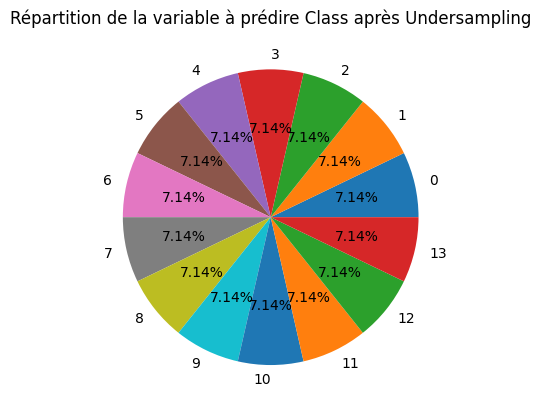

In [9]:
## Nouvelle répartition après Undersampling de nos données dans la base train
plt.pie(
   Y_Undersample.Target.value_counts(normalize = True).values,
   labels = Y_Undersample.Target.value_counts(normalize = True).index,
   autopct='%1.2f%%'
)
plt.title("Répartition de la variable à prédire Class après Undersampling")
plt.show()

In [10]:
Y_Undersample.Target.value_counts() # 340 images par catégorie

0     340
1     340
2     340
3     340
4     340
5     340
6     340
7     340
8     340
9     340
10    340
11    340
12    340
13    340
Name: Target, dtype: int64

Sans oublier que nous séparons dans ce cas ci-présent aussi notre jeu train en deux nouveaux jeux de données : 80% du jeu de données en jeu train et 20% du jeu de données en jeu test.

In [11]:
## Train/Test split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

## Partie OVR

---

### OneVsRestClassifier (SVC)

In [30]:
## Import OVR
from sklearn.multiclass import OneVsRestClassifier

## Import SVM
from sklearn.svm import SVC

OvR_SVC_clf = OneVsRestClassifier(SVC())

OvR_SVC_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [31]:
Y_pred = OvR_SVC_clf.predict(X_test)

In [32]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[13  8 11 ... 12  5  0]
The actual data is:
[6 7 1 ... 1 3 2]
The model is 44.66374269005848% accurate


In [45]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted american_football,Predicted baseball,Predicted basketball,Predicted billiard_ball,Predicted bowling_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
american_football,29,2,1,11,6,15,3,5,4,4,3,2,6,2
baseball,1,24,2,5,7,3,9,10,2,2,4,5,7,3
basketball,4,2,22,5,5,13,2,0,0,3,1,0,2,0
billiard_ball,2,2,5,81,10,8,5,2,8,4,4,3,2,3
bowling_ball,2,0,5,6,34,7,1,4,1,2,4,5,2,2
cricket_ball,2,4,0,4,4,61,8,2,2,2,5,3,3,4
football,1,1,2,7,3,4,56,9,8,3,15,5,4,9
golf_ball,3,5,0,15,8,2,7,30,5,3,7,12,10,2
hockey_ball,3,4,2,7,4,8,4,4,40,1,5,4,12,3
hockey_puck,1,1,1,7,4,5,6,2,1,30,6,3,5,0


In [46]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

7     79
6     71
0     64
8     61
1     60
12    59
3     58
10    57
13    50
5     43
9     42
4     41
2     37
11    35
Name: Y_test, dtype: int64


### OneVsRestClassifier (LinearSVC)

In [47]:
## Import OVR
from sklearn.multiclass import OneVsRestClassifier

## Import SVM
from sklearn.svm import SVC

OvR_SVCL_clf = OneVsRestClassifier(LinearSVC())

OvR_SVCL_clf.fit(X_train, y_train)

C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: Convergenc

OneVsRestClassifier(estimator=LinearSVC())

In [48]:
Y_pred = OvR_SVCL_clf.predict(X_test)

In [49]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[ 7 12  1 ... 11  4  6]
The actual data is:
[6 7 1 ... 1 3 2]
The model is 34.13742690058479% accurate


In [50]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted american_football,Predicted baseball,Predicted basketball,Predicted billiard_ball,Predicted bowling_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
american_football,27,0,6,7,7,7,5,6,8,5,4,1,8,2
baseball,2,17,2,1,4,5,5,16,7,1,3,8,11,2
basketball,4,1,17,2,3,11,5,3,6,0,0,0,6,1
billiard_ball,6,1,4,35,8,9,5,15,13,6,9,12,11,5
bowling_ball,4,0,3,3,23,5,6,5,7,2,6,5,5,1
cricket_ball,2,0,1,4,8,46,7,5,10,2,3,3,10,3
football,2,3,2,12,7,6,37,10,13,3,9,6,9,8
golf_ball,8,6,1,7,2,2,6,31,12,4,8,9,13,0
hockey_ball,5,1,4,8,2,10,4,12,42,0,1,3,7,2
hockey_puck,1,2,0,0,5,9,5,7,5,26,1,2,6,3


In [51]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3     104
6      90
7      78
10     75
1      67
0      66
13     63
8      59
5      58
12     54
4      52
11     47
9      46
2      42
Name: Y_test, dtype: int64


### OneVsRestClassifier (SGDClassifier) 

In [52]:
OvR_SGDClassifier_clf = OneVsRestClassifier(SGDClassifier())

OvR_SGDClassifier_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SGDClassifier())

In [53]:
Y_pred = OvR_SGDClassifier_clf.predict(X_test)

In [54]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[4 6 3 ... 7 4 4]
The actual data is:
[6 7 1 ... 1 3 2]
The model is 20.248538011695906% accurate


In [55]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted american_football,Predicted baseball,Predicted basketball,Predicted billiard_ball,Predicted bowling_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
american_football,15,1,6,10,43,3,2,0,8,0,5,0,0,0
baseball,3,10,2,6,31,2,9,1,15,0,5,0,0,0
basketball,2,0,5,6,34,1,5,0,5,0,1,0,0,0
billiard_ball,6,0,6,35,52,2,5,2,16,1,12,0,1,1
bowling_ball,0,3,1,3,51,1,2,2,5,0,5,0,1,1
cricket_ball,6,0,1,4,67,10,4,0,9,0,1,0,1,1
football,2,1,0,4,51,2,33,3,13,0,15,0,0,3
golf_ball,5,3,1,4,45,0,8,4,30,0,7,0,0,2
hockey_ball,3,2,1,11,24,2,4,2,46,0,3,0,1,2
hockey_puck,1,0,0,6,44,0,4,2,9,4,1,0,1,0


In [56]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

12    115
7     105
3     104
6      94
5      94
11     86
0      78
1      74
13     72
9      68
10     68
8      55
2      54
4      24
Name: Y_test, dtype: int64


## Partie OVO

___

### OneVsOneClassifier (SVC)

In [12]:
## Import OVR
from sklearn.multiclass import OneVsOneClassifier

Ovo_SVC_clf = OneVsOneClassifier(SVC())

Ovo_SVC_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC())

In [13]:
Y_pred = Ovo_SVC_clf.predict(X_test)

In [14]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[ 6  7 11 ... 12  2  0]
The actual data is:
[6 7 1 ... 1 3 2]
The model is 34.72222222222222% accurate


In [15]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted american_football,Predicted baseball,Predicted basketball,Predicted billiard_ball,Predicted bowling_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
american_football,22,0,0,18,7,14,6,5,4,5,1,4,7,0
baseball,3,13,0,8,6,2,13,13,1,0,0,9,16,0
basketball,1,0,9,6,10,16,6,2,2,0,0,1,5,1
billiard_ball,1,6,5,67,14,11,2,4,6,5,3,4,11,0
bowling_ball,0,0,2,12,26,5,6,3,3,3,3,1,8,3
cricket_ball,1,4,0,5,5,53,9,4,3,2,1,3,13,1
football,0,1,0,10,5,4,50,13,5,3,4,10,18,4
golf_ball,0,4,0,11,11,2,9,26,7,4,3,11,20,1
hockey_ball,1,1,3,9,5,8,4,7,25,0,3,5,27,3
hockey_puck,1,0,0,7,8,5,4,6,1,23,4,2,9,2


In [16]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

7     83
6     77
8     76
3     72
10    72
1     71
0     71
13    68
12    65
5     51
2     50
9     49
4     49
11    39
Name: Y_test, dtype: int64


### OneVsOneClassifier (LinearSVC)  

In [17]:
#Import SVM
from sklearn.svm import SVC

Ovo_SVCL_clf = OneVsOneClassifier(LinearSVC())

Ovo_SVCL_clf.fit(X_train, y_train)

C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py:1244: Convergenc

OneVsOneClassifier(estimator=LinearSVC())

In [18]:
Y_pred = Ovo_SVCL_clf.predict(X_test)

In [19]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[13 13  1 ... 11  4  9]
The actual data is:
[6 7 1 ... 1 3 2]
The model is 37.280701754385966% accurate


In [20]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted american_football,Predicted baseball,Predicted basketball,Predicted billiard_ball,Predicted bowling_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
american_football,25,1,5,9,4,8,7,7,6,9,2,2,6,2
baseball,1,21,2,2,3,3,3,15,6,2,4,6,10,6
basketball,5,2,24,3,3,5,5,3,1,2,2,0,2,2
billiard_ball,3,4,11,36,9,11,6,8,9,8,12,4,10,8
bowling_ball,2,2,6,3,28,4,5,5,0,4,2,4,5,5
cricket_ball,8,2,4,5,7,54,3,2,2,5,2,1,8,1
football,2,6,6,5,9,4,40,10,10,5,8,5,5,12
golf_ball,3,3,2,5,3,3,8,36,13,3,9,5,13,3
hockey_ball,4,4,3,6,2,10,5,10,42,0,0,4,9,2
hockey_puck,1,0,1,6,5,7,4,9,3,25,3,2,5,1


In [21]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3     103
6      87
7      73
0      68
10     68
1      63
13     60
8      59
12     58
5      50
9      47
4      47
11     40
2      35
Name: Y_test, dtype: int64


### OneVsOneClassifier (SGDClassifier)

In [22]:
Ovo_SGDClassifier_clf = OneVsOneClassifier(SGDClassifier())

Ovo_SGDClassifier_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier())

In [23]:
Y_pred = Ovo_SGDClassifier_clf.predict(X_test)

In [24]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[7 7 1 ... 7 2 0]
The actual data is:
[6 7 1 ... 1 3 2]
The model is 26.82748538011696% accurate


In [25]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted american_football,Predicted baseball,Predicted basketball,Predicted billiard_ball,Predicted bowling_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
american_football,23,5,7,2,3,25,7,13,2,2,1,1,2,0
baseball,1,26,2,1,1,8,7,18,7,2,2,2,6,1
basketball,4,2,15,0,3,19,6,1,2,3,2,0,2,0
billiard_ball,3,7,13,14,1,29,9,13,17,8,4,7,13,1
bowling_ball,4,2,6,1,3,11,10,14,3,6,4,2,7,2
cricket_ball,4,2,2,0,1,63,6,7,3,4,0,3,8,1
football,3,10,3,3,0,10,44,24,6,2,6,2,8,6
golf_ball,2,13,2,1,0,9,11,41,7,2,4,5,11,1
hockey_ball,3,7,2,3,0,21,6,13,34,0,0,3,8,1
hockey_puck,3,3,1,1,1,10,5,12,3,15,6,1,9,2


In [26]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3     125
10     91
6      83
11     81
13     75
4      72
0      70
12     69
7      68
8      67
1      58
9      57
2      44
5      41
Name: Y_test, dtype: int64


## Arbre de décision

In [30]:
arbre = tree.DecisionTreeClassifier()

In [31]:
arbre.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
Y_pred = arbre.predict(X_test)

In [33]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[ 5  0  7 ... 13  6 10]
The actual data is:
[6 7 1 ... 1 3 2]
The model is 29.166666666666668% accurate


In [34]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted american_football,Predicted baseball,Predicted basketball,Predicted billiard_ball,Predicted bowling_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
american_football,18,6,9,5,8,7,7,5,4,9,12,0,2,1
baseball,5,13,5,4,4,7,2,9,6,3,3,5,9,9
basketball,5,1,15,4,5,6,3,2,6,3,4,1,2,2
billiard_ball,8,5,5,40,15,11,7,12,6,7,4,3,11,5
bowling_ball,3,3,7,11,18,4,2,5,4,6,3,3,4,2
cricket_ball,4,8,3,7,3,42,5,6,8,5,1,3,6,3
football,8,7,5,9,2,11,33,4,8,6,8,9,12,5
golf_ball,6,6,4,7,4,6,8,25,8,4,3,8,13,7
hockey_ball,0,5,5,8,5,6,4,5,34,3,8,3,13,2
hockey_puck,7,0,4,3,4,3,4,3,6,24,2,4,4,4


In [35]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3     99
6     94
7     84
10    81
0     75
12    74
1     71
8     67
13    63
5     62
4     57
11    50
9     48
2     44
Name: Y_test, dtype: int64


## Random Forest

In [36]:
RF = RandomForestClassifier()

In [37]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
Y_pred = RF.predict(X_test)

In [39]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[ 6  8  1 ... 12  2  6]
The actual data is:
[6 7 1 ... 1 3 2]
The model is 47.66081871345029% accurate


In [40]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted american_football,Predicted baseball,Predicted basketball,Predicted billiard_ball,Predicted bowling_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
american_football,40,1,1,16,4,13,3,3,4,3,3,2,0,0
baseball,3,23,1,6,5,3,11,11,6,0,1,2,11,1
basketball,3,1,27,8,4,6,4,1,1,1,0,2,1,0
billiard_ball,0,2,3,83,6,8,4,3,12,4,3,1,6,4
bowling_ball,1,1,2,19,27,5,5,2,5,1,2,1,4,0
cricket_ball,1,5,1,4,3,64,5,6,2,3,2,3,3,2
football,1,3,0,11,4,1,66,11,5,5,4,2,10,4
golf_ball,2,4,0,14,4,3,6,48,4,2,7,7,8,0
hockey_ball,2,5,2,6,6,6,4,4,49,0,2,1,11,3
hockey_puck,4,1,3,12,4,2,5,3,1,29,2,1,5,0


In [41]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

13    65
7     61
1     61
6     61
10    57
3     56
12    54
0     53
8     52
4     48
9     43
5     40
11    33
2     32
Name: Y_test, dtype: int64


## RidgeClassifier

In [42]:
ridge = RidgeClassifierCV()

In [43]:
ridge.fit(X_train, y_train)

RidgeClassifierCV()

In [44]:
Y_pred = ridge.predict(X_test)

In [45]:
## Accuracy du modèle 
qual_prev(Y_pred,y_test)

The predicted Data is :
[ 7 12  1 ...  7  4  7]
The actual data is:
[6 7 1 ... 1 3 2]
The model is 31.944444444444443% accurate


In [46]:
## Matrice de confusion
matrice_de_confusion(Y_pred,y_test)

,Predicted american_football,Predicted baseball,Predicted basketball,Predicted billiard_ball,Predicted bowling_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
american_football,22,1,4,9,6,8,3,8,10,4,5,2,6,5
baseball,5,13,1,4,5,6,6,14,4,1,1,10,12,2
basketball,5,1,19,3,2,10,4,1,5,0,0,3,5,1
billiard_ball,4,4,5,37,9,9,7,14,14,7,6,4,12,7
bowling_ball,3,1,1,9,23,4,1,6,4,5,4,6,6,2
cricket_ball,2,0,2,6,6,41,9,7,14,4,1,5,7,0
football,7,6,3,7,7,5,28,15,11,4,2,4,21,7
golf_ball,5,7,2,7,4,3,4,29,9,3,8,9,17,2
hockey_ball,2,4,3,10,3,7,3,10,39,2,4,4,9,1
hockey_puck,5,1,0,1,4,8,5,8,4,25,2,3,4,2


In [47]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3     102
6      99
7      80
10     76
1      71
0      71
13     64
5      63
8      62
12     54
4      52
11     50
9      47
2      40
Name: Y_test, dtype: int64


## Régression Logistique

In [48]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class="multinomial")

In [49]:
LR.fit(X_train, y_train)

C:\Users\alexa\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [50]:
Y_pred = LR.predict(X_test)

In [51]:
## Accuracy du modèle
qual_prev(Y_pred,y_test)

The predicted Data is :
[ 7  7 11 ...  7  4  0]
The actual data is:
[6 7 1 ... 1 3 2]
The model is 25.950292397660817% accurate


In [52]:
## Matrice de confusion 
matrice_de_confusion(Y_pred,y_test)

,Predicted american_football,Predicted baseball,Predicted basketball,Predicted billiard_ball,Predicted bowling_ball,Predicted cricket_ball,Predicted football,Predicted golf_ball,Predicted hockey_ball,Predicted hockey_puck,Predicted rugby_ball,Predicted shuttlecock,Predicted table_tennis_ball,Predicted volleyball
american_football,14,3,6,11,8,12,5,13,2,7,2,0,5,5
baseball,3,17,3,2,2,2,10,22,7,0,2,8,5,1
basketball,3,3,11,3,6,10,12,2,3,2,1,1,2,0
billiard_ball,4,3,7,39,9,6,7,16,13,6,9,7,9,4
bowling_ball,0,3,4,5,15,7,11,6,3,6,3,3,6,3
cricket_ball,7,2,2,9,4,35,6,8,5,9,4,3,6,4
football,2,7,2,9,4,5,36,26,6,4,10,5,1,10
golf_ball,5,7,1,11,4,2,6,36,13,6,5,4,7,2
hockey_ball,1,4,3,13,2,13,6,17,29,1,0,4,7,1
hockey_puck,3,1,0,7,6,8,6,6,3,14,2,3,8,5


In [53]:
## Nombre de fois ou le modèle se trompe pour chaque catégorie
difference(Y_pred,y_test)

3     100
6      91
12     87
10     84
0      79
7      73
8      72
13     71
5      69
1      67
4      60
9      58
11     54
2      48
Name: Y_test, dtype: int64


# 6) Interprétation du meilleur modèle

---

<div style="text-align: justify">
Nous allons maintenant présenter l'interpréation de notre meilleur modèle s'avérant être 